In [47]:
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Read Raw Files of Covid Cases and Vaccines

In [48]:
covid_df = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
vaccine_df = pd.read_csv('../data/vaccine_with_protocol.csv')

In [49]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [50]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


##### Rename the Column Headers

In [51]:
vaccine_df = vaccine_df.rename(columns={'vacc_date':'date','zipcode':'zip','count_given':'vaccines','dose_nbr':'dose'})
covid_df =covid_df.rename(columns={'Specimen Collection Date':'date','Zip':'zip','Cases':'cases'})

##### Change of Data Types
The Covid Zipcodes are changed from float64 to String in Covid_df
The Vaccine Zipcode are changed from float64 to String   
The dates are changed to date type   

In [52]:
covid_df['zip'] = covid_df['zip'].astype('Int64').astype(str)
covid_df['date']= pd.to_datetime(covid_df['date'])
vaccine_df['zip'] = vaccine_df['zip'].astype('Int64').astype(str)
vaccine_df['date'] = pd.to_datetime(vaccine_df['date'])

In [53]:
covid_df.info()
print('\n***********************************************************\n')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8832 non-null   datetime64[ns]
 1   zip     8832 non-null   object        
 2   cases   8832 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 207.1+ KB

***********************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6694 non-null   datetime64[ns]
 1   zip       6694 non-null   object        
 2   vaccines  6686 non-null   float64       
 3   dose      6686 non-null   float64       
 4   protocol  6694 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 261.6+ KB


#### Drop Rows that do not have ZIP numbers in the Vaccine_df

In [54]:
vaccine_df.info()
vaccine_df.dropna(inplace=True)
print('After Dropping \n\n')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6694 non-null   datetime64[ns]
 1   zip       6694 non-null   object        
 2   vaccines  6686 non-null   float64       
 3   dose      6686 non-null   float64       
 4   protocol  6694 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 261.6+ KB
After Dropping 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6686 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6686 non-null   datetime64[ns]
 1   zip       6686 non-null   object        
 2   vaccines  6686 non-null   float64       
 3   dose      6686 non-null   float64       
 4   protocol  6686 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memo

##### Clean up the count of Vaccines
The team has decided the one vaccine is considered an individual to be vaccinated

In [55]:
vac_clean_df=vaccine_df[vaccine_df['dose']==1]
print('vaccine_df sum -',vaccine_df['vaccines'].sum())
print('vac_clean sum -',vac_clean_df['vaccines'].sum())

vaccine_df sum - 334890.0
vac_clean sum - 220038.0


###### Replace the Data Frame of vaccination cleaned to the original df

In [56]:
vaccine_df=vac_clean_df
vaccine_df

,date,zip,vaccines,dose,protocol
0,2020-12-12,37215,1.0,1.0,two-shot
2,2020-12-14,37215,1.0,1.0,two-shot
3,2020-12-15,37221,1.0,1.0,two-shot
4,2020-12-16,37215,1.0,1.0,two-shot
5,2020-12-17,37013,16.0,1.0,two-shot
...,...,...,...,...,...
6686,2021-04-07,37221,81.0,1.0,two-shot
6687,2021-04-07,37221,2.0,1.0,one-shot
6689,2021-04-07,37228,9.0,1.0,two-shot
6691,2021-04-07,<NA>,8.0,1.0,two-shot


Text(0.5, 1.0, 'Vaccines by date')

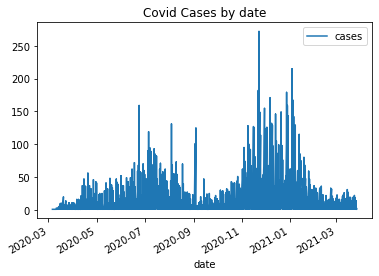

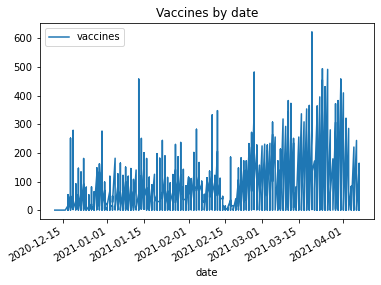

In [79]:
covid_df.plot.line('date','cases')
plt.title('Covid Cases by date')

vaccine_df.plot.line('date','vaccines')
plt.title('Vaccines by date')

#### Read Ethnicity Population and Gather Total Population Figures to % cases and % vaccines

In [57]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
pop_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)

###### Clean the pop_df file to extract only total population

In [58]:

#Drop columns with Error next to each of the columns
pop_df = pop_df[pop_df.columns.drop(list(pop_df.filter(regex='Error')))]
#Drop a Level of 'Value' headers that mean nothing to the data
pop_df.columns = pop_df.columns.droplevel(1)
# Remove unnecessary rows that will not be part of our statistics or you can choose to select certain rows into a DF
# Two separate data frame created. One of only the total population and the other to represent different races
#ethnicity_df = pop_df.drop([0,1,9,10,12,13,14,15,16,17,18,19,20])
pop_df = pop_df.iloc[[0],:]

# #Rotate the dataframe so that Zip can be column and the race data set across
pop_df= pop_df.set_index('Unnamed: 0_level_0').T.reset_index()
#ethnicity_df= ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index()
# #Rename the index row to Zip
pop_df = pop_df.rename(columns={'index':'zip','Total:':'population'})
#ethnicity_df=ethnicity_df.rename(columns={'index':'zip','Total:':'total','Two or more races:':'Two or more races',
#                                        'Hispanic or Latino:':'Hispanic or Latino'})

pop_df

Unnamed: 0_level_0,zip,population
0,37010,4966
1,37012,2185
2,37013,97939
3,37014,2835
4,37015,17665
...,...,...
113,38552,157
114,38560,1405
115,38563,3410
116,38567,685


In [59]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
ethnicity_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 1)
#ethnicity_df

### Merge Population by Zip to Covid Cases & Vaccine Cases as a %
    - First summarize the cases and vaccines by Zip 
    - Merge population dataframe to each of the dataframes
    

#### Create dataframe for covid by zip

In [76]:
#cases per zipcode
covid_by_zip =covid_df.groupby('zip',as_index=False)['cases'].sum()
#sort by case Number
covid_by_zip  =covid_by_zip.sort_values('cases', ascending=False)
#Remove rows that have <NA.
covid_by_zip.drop(index=[31], axis=0, inplace=True)
covid_by_zip

,zip,cases
0,37013,13354
18,37211,10233
16,37209,5072
14,37207,4729
6,37115,4574
4,37076,4279
28,37221,3910
24,37217,3907
21,37214,3508
10,37203,3346


Text(0.5, 1.0, 'Covid Cases by zip')

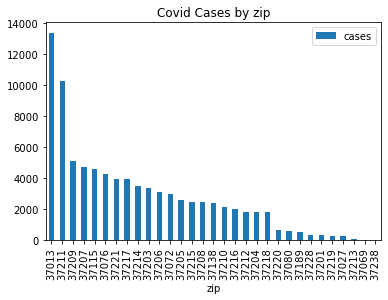

In [77]:
covid_by_zip.plot.bar('zip','cases')
plt.title('Covid Cases by zip')

##### Create dataframe for vaccines by zip

In [61]:
#vaccines per zipcode
vac_by_zip =vaccine_df.groupby('zip',as_index=False)['vaccines'].sum()
vac_by_zip.vaccines.sum()
#vaccines by zip
vac_by_zip =vac_by_zip.sort_values('vaccines', ascending=False)
#Remove rows that have <NA.
vac_by_zip.drop(index=[31], axis=0, inplace=True)
vac_by_zip

,zip,vaccines
18,37211,19175.0
0,37013,18465.0
28,37221,17222.0
12,37205,14666.0
16,37209,13600.0
22,37215,12132.0
4,37076,11113.0
13,37206,10124.0
14,37207,9255.0
21,37214,9198.0


Text(0.5, 1.0, 'Vaccines by zip')

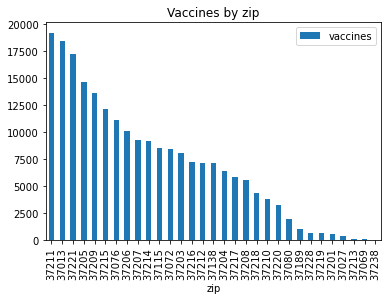

In [78]:
vac_by_zip.plot.bar('zip','vaccines')
plt.title('Vaccines by zip')

#### Identify the Largest and Smallest Covid and Vaccine Numbers

In [62]:
top5cases = covid_by_zip.nlargest(5,'cases')
top5vaccines = vac_by_zip.nlargest(5,'vaccines')
bottom5cases = covid_by_zip.nsmallest(5,'cases')
bottom5vaccines = vac_by_zip.nsmallest(5,'vaccines')

print('The Top Covid Cases by Zip\n\n',top5cases)
print('\n***********************************\n')
print('The Bottom Covid Cases by Zip\n\n',bottom5cases)
print('\n***********************************\n')
print('The Top Vaccine Numbers by Zip\n\n',top5vaccines)
print('\n***********************************\n')
print('The Bottom Vaccine Numbers by Zip\n\n',bottom5vaccines)

The Top Covid Cases by Zip

       zip  cases
0   37013  13354
18  37211  10233
16  37209   5072
14  37207   4729
6   37115   4574

***********************************

The Bottom Covid Cases by Zip

       zip  cases
30  37238      3
2   37069     16
20  37213     65
1   37027    231
26  37219    270

***********************************

The Top Vaccine Numbers by Zip

       zip  vaccines
18  37211   19175.0
0   37013   18465.0
28  37221   17222.0
12  37205   14666.0
16  37209   13600.0

***********************************

The Bottom Vaccine Numbers by Zip

       zip  vaccines
30  37238       3.0
2   37069      50.0
20  37213      72.0
1   37027     352.0
9   37201     576.0


###### Merge Covid and Vaccine Dataframes as Zip is the same for both data sets

In [63]:
cov_plus_vac = pd.merge(left=covid_by_zip, right=vac_by_zip, how='left', left_on='zip', right_on='zip')
cov_plus_vac

,zip,cases,vaccines
0,37013,13354,18465.0
1,37027,231,352.0
2,37069,16,50.0
3,37072,2984,8460.0
4,37076,4279,11113.0
5,37080,574,1970.0
6,37115,4574,8520.0
7,37138,2359,7152.0
8,37189,479,1056.0
9,37201,299,576.0


##### Bring Total Population by Zip into the cov_plus_vac dataframe 

In [64]:
c_v_zip= pd.merge(left=cov_plus_vac, right=pop_df, how='left', left_on='zip', right_on='zip')
c_v_zip

,zip,cases,vaccines,population
0,37013,13354,18465.0,97939.0
1,37027,231,352.0,56117.0
2,37069,16,50.0,20467.0
3,37072,2984,8460.0,31492.0
4,37076,4279,11113.0,40161.0
5,37080,574,1970.0,7394.0
6,37115,4574,8520.0,40343.0
7,37138,2359,7152.0,23784.0
8,37189,479,1056.0,4016.0
9,37201,299,576.0,1619.0


In [65]:
top5cases = c_v_zip.nlargest(5,'cases')
top5vaccines = c_v_zip.nlargest(5,'vaccines')
bottom5cases = c_v_zip.nsmallest(5,'cases')
bottom5vaccines = c_v_zip.nsmallest(5,'vaccines')

print('The Top Covid Cases by Zip\n\n',top5cases)
print('\n***********************************\n')
print('The Bottom Covid Cases by Zip\n\n',bottom5cases)
print('\n***********************************\n')
print('The Top Vaccine Numbers by Zip\n\n',top5vaccines)
print('\n***********************************\n')
print('The Bottom Vaccine Numbers by Zip\n\n',bottom5vaccines)

The Top Covid Cases by Zip

       zip  cases  vaccines  population
0   37013  13354   18465.0     97939.0
18  37211  10233   19175.0     75955.0
16  37209   5072   13600.0     38664.0
14  37207   4729    9255.0     39544.0
6   37115   4574    8520.0     40343.0

***********************************

The Bottom Covid Cases by Zip

       zip  cases  vaccines  population
30  37238      3       3.0         NaN
2   37069     16      50.0     20467.0
20  37213     65      72.0        95.0
1   37027    231     352.0     56117.0
26  37219    270     638.0      1154.0

***********************************

The Top Vaccine Numbers by Zip

       zip  cases  vaccines  population
18  37211  10233   19175.0     75955.0
0   37013  13354   18465.0     97939.0
28  37221   3910   17222.0     41017.0
12  37205   2566   14666.0     23790.0
16  37209   5072   13600.0     38664.0

***********************************

The Bottom Vaccine Numbers by Zip

       zip  cases  vaccines  population
30  37238      

###### Get Percentage of Vaccines and Covid Cases to the Population by Zip

In [66]:
# First Method of doing calculation
c_v_zip['perc_cases'] = round(c_v_zip.cases / c_v_zip.population * 100, 2)
# Second Method of doing Calculation
c_v_zip['perc_vacc'] =c_v_zip.apply(lambda row: round(100* float(row['vaccines']) / float(row['population']),2), axis=1)
# c_v_zip['perc_of_pop'] = round(c_v_zip.population / c_v_zip.population.sum() * 100,2)
# c_v_zip['perc_cases_by_pop'] = round(c_v_zip.cases / c_v_zip.population.sum() * 100,2)
# c_v_zip['perc_vaccines_by_pop'] = round(c_v_zip.vaccines / c_v_zip.population.sum() * 100,2)
c_v_zip.head()

,zip,cases,vaccines,population,perc_cases,perc_vacc
0,37013,13354,18465.0,97939.0,13.64,18.85
1,37027,231,352.0,56117.0,0.41,0.63
2,37069,16,50.0,20467.0,0.08,0.24
3,37072,2984,8460.0,31492.0,9.48,26.86
4,37076,4279,11113.0,40161.0,10.65,27.67


###### Drop the industrial Zip beltway from the records

In [67]:
c_v_zip = c_v_zip[c_v_zip['zip'] != '37213']
c_v_zip 
#confirm Line index 20 is removed. 

,zip,cases,vaccines,population,perc_cases,perc_vacc
0,37013,13354,18465.0,97939.0,13.64,18.85
1,37027,231,352.0,56117.0,0.41,0.63
2,37069,16,50.0,20467.0,0.08,0.24
3,37072,2984,8460.0,31492.0,9.48,26.86
4,37076,4279,11113.0,40161.0,10.65,27.67
5,37080,574,1970.0,7394.0,7.76,26.64
6,37115,4574,8520.0,40343.0,11.34,21.12
7,37138,2359,7152.0,23784.0,9.92,30.07
8,37189,479,1056.0,4016.0,11.93,26.29
9,37201,299,576.0,1619.0,18.47,35.58


Text(0.5, 1.0, '% of Covid Cases by zip')

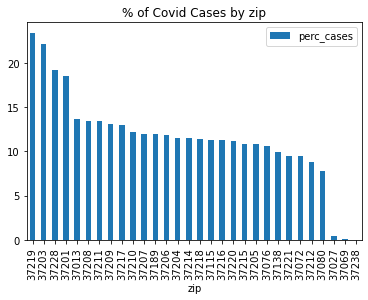

In [87]:
c_v_zip=c_v_zip.sort_values('perc_cases',ascending=False)
c_v_zip.plot.bar('zip','perc_cases')
plt.title('% of Covid Cases by zip')

##### Read and Upload file Hispanic or Latino Origin by Race

In [71]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
ethnicity_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 1)
#Drop columns with Error next to each of the columns
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
#Drop a Level of Value headers that mean nothing to the data
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)
# Remove unnecessary rows that will not be part of our statistics or you can choose to select certain rows into a DF
ethnicity_df = ethnicity_df.drop([0,1,9,10,12,13,14,15,16,17,18,19,20,21])

#Rotate the dataframe so that Zip can be column and the race data set across
ethnicity_df= ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index()
#Rename the Zip row
ethnicity_df=ethnicity_df.rename(columns={'index':'zip','Total:':'total','Two or more races:':'Two or more races',
                                         'Hispanic or Latino:':'Hispanic or Latino'})

ethnicity_df.head()

Unnamed: 0_level_0,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37010,0.906565,0.049335,0.000403,0.005437,0.0,0.0,0.005437,0.032823
1,37012,0.938215,0.03341,0.0,0.001373,0.0,0.0,0.003661,0.023341
2,37013,0.409234,0.339803,0.00097,0.043394,0.0,0.003819,0.031162,0.171617
3,37014,0.946032,0.006349,0.0,0.016578,0.0,0.0,0.012698,0.018342
4,37015,0.896802,0.017209,0.008322,0.006057,0.0,0.000283,0.020549,0.050778


In [72]:
# Every row starting white alone is multiplied for a Percentage representation 
#Columns 0 are skipped because of the zip code
ethnicity_df.iloc[:,1:] = ethnicity_df.iloc[:,1:] * 100
ethnicity_df.head()

Unnamed: 0_level_0,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37010,90.656464,4.933548,0.040274,0.543697,0.0,0.0,0.543697,3.28232
1,37012,93.82151,3.340961,0.0,0.1373,0.0,0.0,0.366133,2.334096
2,37013,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
3,37014,94.603175,0.634921,0.0,1.657848,0.0,0.0,1.269841,1.834215
4,37015,89.680159,1.720917,0.832154,0.605718,0.0,0.028305,2.054911,5.077838


##### Filter the Top 10 Zip codes with covid percentage cases (perc_cases)

In [89]:
top10_cases = c_v_zip.nlargest(10,'perc_cases')
top10_cases

,zip,cases,vaccines,population,perc_cases,perc_vacc
26,37219,270,638.0,1154.0,23.40,55.29
10,37203,3346,8029.0,15091.0,22.17,53.20
29,37228,310,655.0,1615.0,19.20,40.56
9,37201,299,576.0,1619.0,18.47,35.58
0,37013,13354,18465.0,97939.0,13.64,18.85
15,37208,2428,5526.0,18011.0,13.48,30.68
18,37211,10233,19175.0,75955.0,13.47,25.25
16,37209,5072,13600.0,38664.0,13.12,35.17
24,37217,3907,5837.0,30146.0,12.96,19.36
17,37210,2100,3747.0,17248.0,12.18,21.72


###### Merge the top10_cases with the Ethnicity_df to have ethnicity data

In [96]:
topten_zip= pd.merge(left=top10_cases, right=ethnicity_df, how='left', left_on='zip', right_on='zip')
topten_zip

,zip,cases,vaccines,population,perc_cases,perc_vacc,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37219,270,638.0,1154.0,23.40,55.29,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551
1,37203,3346,8029.0,15091.0,22.17,53.20,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386
2,37228,310,655.0,1615.0,19.20,40.56,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0
3,37201,299,576.0,1619.0,18.47,35.58,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644
4,37013,13354,18465.0,97939.0,13.64,18.85,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
5,37208,2428,5526.0,18011.0,13.48,30.68,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147
6,37211,10233,19175.0,75955.0,13.47,25.25,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466
7,37209,5072,13600.0,38664.0,13.12,35.17,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606
8,37217,3907,5837.0,30146.0,12.96,19.36,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356
9,37210,2100,3747.0,17248.0,12.18,21.72,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116


##### Drop the Cases, vaccines, population, perc_cases, perc_vacc columns in a new data frame to create a stack bar of ethnicity

In [107]:
# Copy all rows and the selective columns by index numbers
stackbar = topten_zip.iloc[:,[0,6,7,8,9,10,11,12,13]]
stackbar

,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37219,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551
1,37203,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386
2,37228,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0
3,37201,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644
4,37013,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
5,37208,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147
6,37211,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466
7,37209,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606
8,37217,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356
9,37210,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116


##### Load Neighboorhood CSV that will be required to add origin by race file merge

In [109]:
# Load neighborhood data from Richie's file
neighborhood = pd.read_csv('../data/neighborhoods.csv')
# Conver the Zip column to String vs the Default Int
neighborhood.zip=neighborhood.zip.astype('str')
neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   zip            30 non-null     object
 1   neighborhood   30 non-null     object
 2   neighborhood2  30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [112]:
#Remove Neighborhood2 column
neighborhood = neighborhood.drop(columns='neighborhood2')
neighborhood.head()

,zip,neighborhood
0,37013,Antioch
1,37027,Brentwood
2,37069,Franklin
3,37072,Goodlettesville
4,37076,South Hermitage


Merge neighborhood to show the neighborhood map

In [113]:
# # Merge to add neighborhood to the Zipcode and finally merge zipcode & neighborhoods
#print(zipcodes)
#Merge Neighborhoods to Zip in the merge_zip file
stack_bar = pd.merge(left=stackbar, right=neighborhood, left_on='zip', right_on='zip', how='inner')
stack_bar

,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,neighborhood
0,37219,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,Capitol Hill
1,37203,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,Music Row
2,37228,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,Metro Center
3,37201,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644,Downtown
4,37013,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703,Antioch
5,37208,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147,Germantown
6,37211,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466,Crieve Hall
7,37209,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606,Sylvan Park
8,37217,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356,South Hermitage
9,37210,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116,South Nashville


In [116]:
# Adding Zip + Neighborhood to a column by itself
stack_bar['zip1']= stack_bar['zip']+ "\n" + stack_bar['neighborhood']
stack_bar = stack_bar.drop(columns='zip')


In [117]:
# Rename Zip column after dropping the original column
stack_bar = stack_bar.rename(columns={'zip1':'zip'})
stack_bar

,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,neighborhood,zip
0,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,Capitol Hill,37219\nCapitol Hill
1,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,Music Row,37203\nMusic Row
2,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,Metro Center,37228\nMetro Center
3,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644,Downtown,37201\nDowntown
4,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703,Antioch,37013\nAntioch
5,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147,Germantown,37208\nGermantown
6,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466,Crieve Hall,37211\nCrieve Hall
7,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606,Sylvan Park,37209\nSylvan Park
8,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356,South Hermitage,37217\nSouth Hermitage
9,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116,South Nashville,37210\nSouth Nashville


#### Graph a Stackbar with the above information

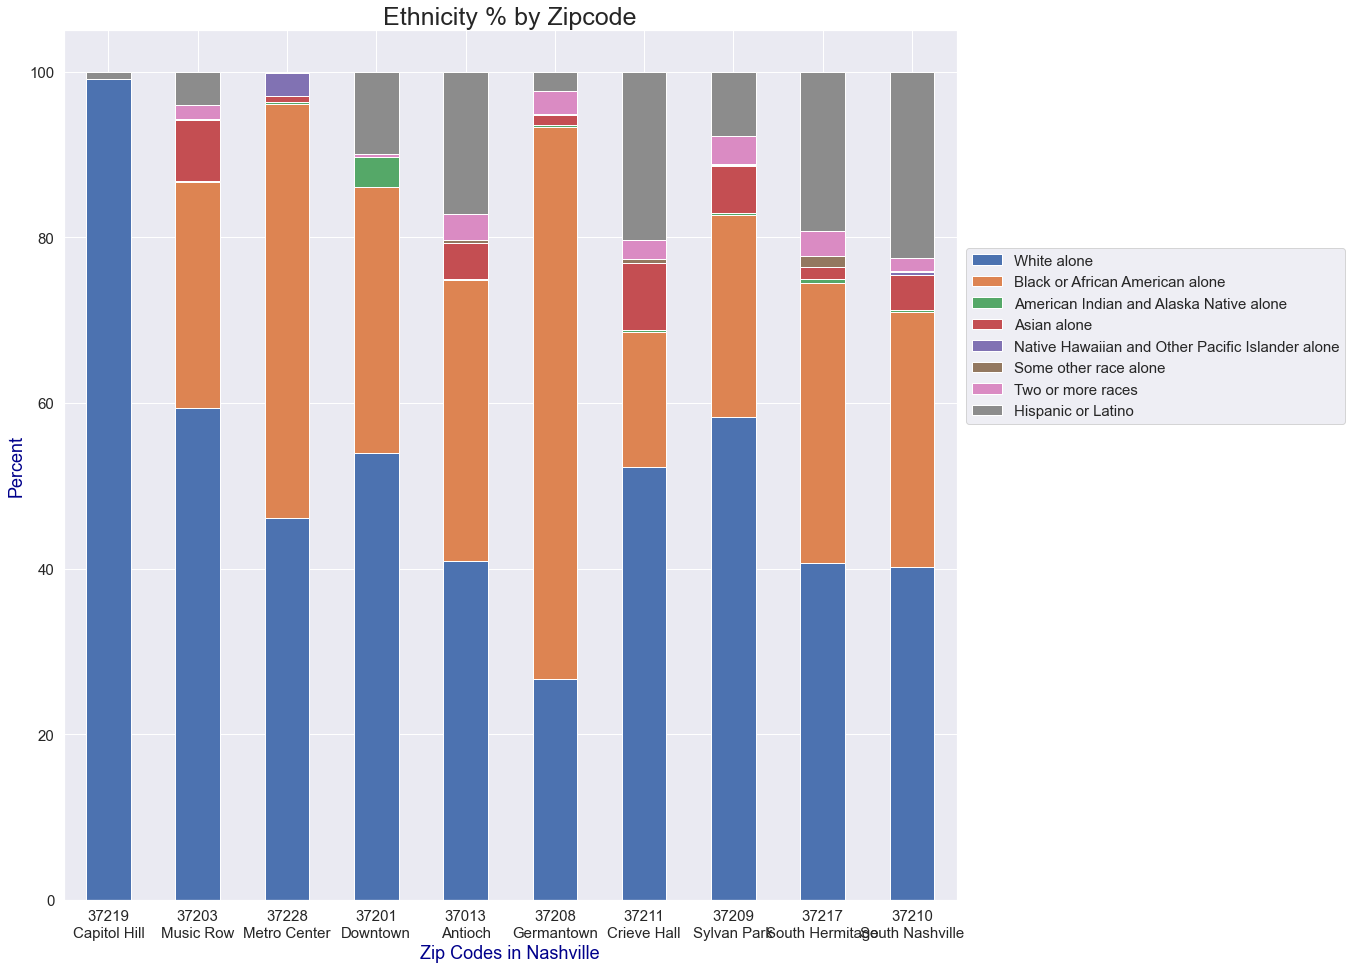

In [126]:
sns.set()
sns.set_context({"figure.figsize":(16,16)})

stack_bar.set_index('zip').plot(kind='bar',stacked=True,)
plt.title("Ethnicity % by Zipcode", size = 25)
plt.ylabel("Percent",size =18, color='darkblue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=0)
plt.xlabel("Zip Codes in Nashville",size =18, color='darkblue')
plt.legend(bbox_to_anchor=(1.01, 0.75), loc=2,  prop={"size":15}, borderaxespad=0.)

plt.savefig('new_population_ethnicity.png',transparent=True)

##### Load geospatial zips

In [128]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
